# Clasificación de infarto cardíaco


## Introducción


Acontinuación se realizará una clasificación binaria para predecir en base a las variables si un paciente con un determinado número de medidas médicas es susceptible de tener enfermedad de corazón o no.

La clasificación se considerará satisfactoria si alcanza una exactitud de 0.9.

Para ello se realizará un análisis exploratorio de las variables evaluando que variables aportan a la predicción, posteriormente se dividirán los datos en conjunto de entrenamiento (80%) y conjunto de validación (20%).

Con esto se realizarán diversos algoritmos de clasificación binaria mediante ternsorflow, donde el entrenamiento se realizará utilizando validación cruzada aleatoria (en cada algoritmo hay una descripción del procedimiento utilizado).

Finalmente la comparación de los algoritmos se relizará con la exactitud de cada algoritmo sobre el conjunto de validación.

## Análisis exploratorio.

### Contexto

Esta base de datos contiene 76 atributos, pero todos los experimentos publicados se refieren al uso de un subconjunto de 14 de ellos. En particular, la base de datos de Cleveland es la única que los investigadores de ML han utilizado hasta la fecha. El campo "objetivo" se refiere a la presencia de enfermedad cardíaca en el paciente. Tiene un valor entero de 0 (sin presencia) a 4.

### Contenido

Información del atributo:
1. **(age)**     : edad
2. **(sex)**     : sexo
3. **(cp)**      : tipo de dolor en el pecho (4 valores)
4. **(trestbps)**: presión arterial en reposo
5. **(chol)**    : colesterol sérico en mg/dl
6. **(fbs)**     : azúcar en sangre (en ayunas) > 120 mg/dl
7. **(restecg)** : Resultados electrocardiográficos en reposo (valores 0,1,2)
8. **(thalach)** : frecuencia cardíaca máxima alcanzada
9. **(exang)**   : angina inducida por ejercicio
10. **(oldpeak)** : depresión del ST inducida por el ejercicio relativo al descanso
11. **(slope)**   : pendiente del segmento ST de ejercicio máximo
12. **(ca)**      : número de vasos principales (0-3) coloreados por flourosopía
13. **(thal)**    : 3 = normal; 6 = defecto fijo; 7 = defecto reversible


### Análisis de los datos

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import requests
from sklearn.preprocessing import normalize
import os.path
import csv

In [2]:
data_file_name = "heart.csv"
data = []
with open(data_file_name, newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    data_header = next(csv_reader)
    for row in csv_reader:
        data.append(row)

In [3]:
data_header[0] = 'age'
pd.DataFrame(data, columns=data_header).head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
# Transformación de datos de string a float.
x_vals00 = np.array([[float(x[i]) for i in range(np.shape(data)[1])] for x in data])
x_vals0 = np.array([[float(x[i]) for i in range(np.shape(data)[1]-1)] for x in data])
y_vals = np.array([float(x[(np.shape(data)[1]-1)]) for x in data])

df = pd.DataFrame(x_vals00, columns=data_header[0:(np.shape(data)[1])])
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
5,57.0,1.0,0.0,140.0,192.0,0.0,1.0,148.0,0.0,0.4,1.0,0.0,1.0,1.0
6,56.0,0.0,1.0,140.0,294.0,0.0,0.0,153.0,0.0,1.3,1.0,0.0,2.0,1.0
7,44.0,1.0,1.0,120.0,263.0,0.0,1.0,173.0,0.0,0.0,2.0,0.0,3.0,1.0
8,52.0,1.0,2.0,172.0,199.0,1.0,1.0,162.0,0.0,0.5,2.0,0.0,3.0,1.0
9,57.0,1.0,2.0,150.0,168.0,0.0,1.0,174.0,0.0,1.6,2.0,0.0,2.0,1.0


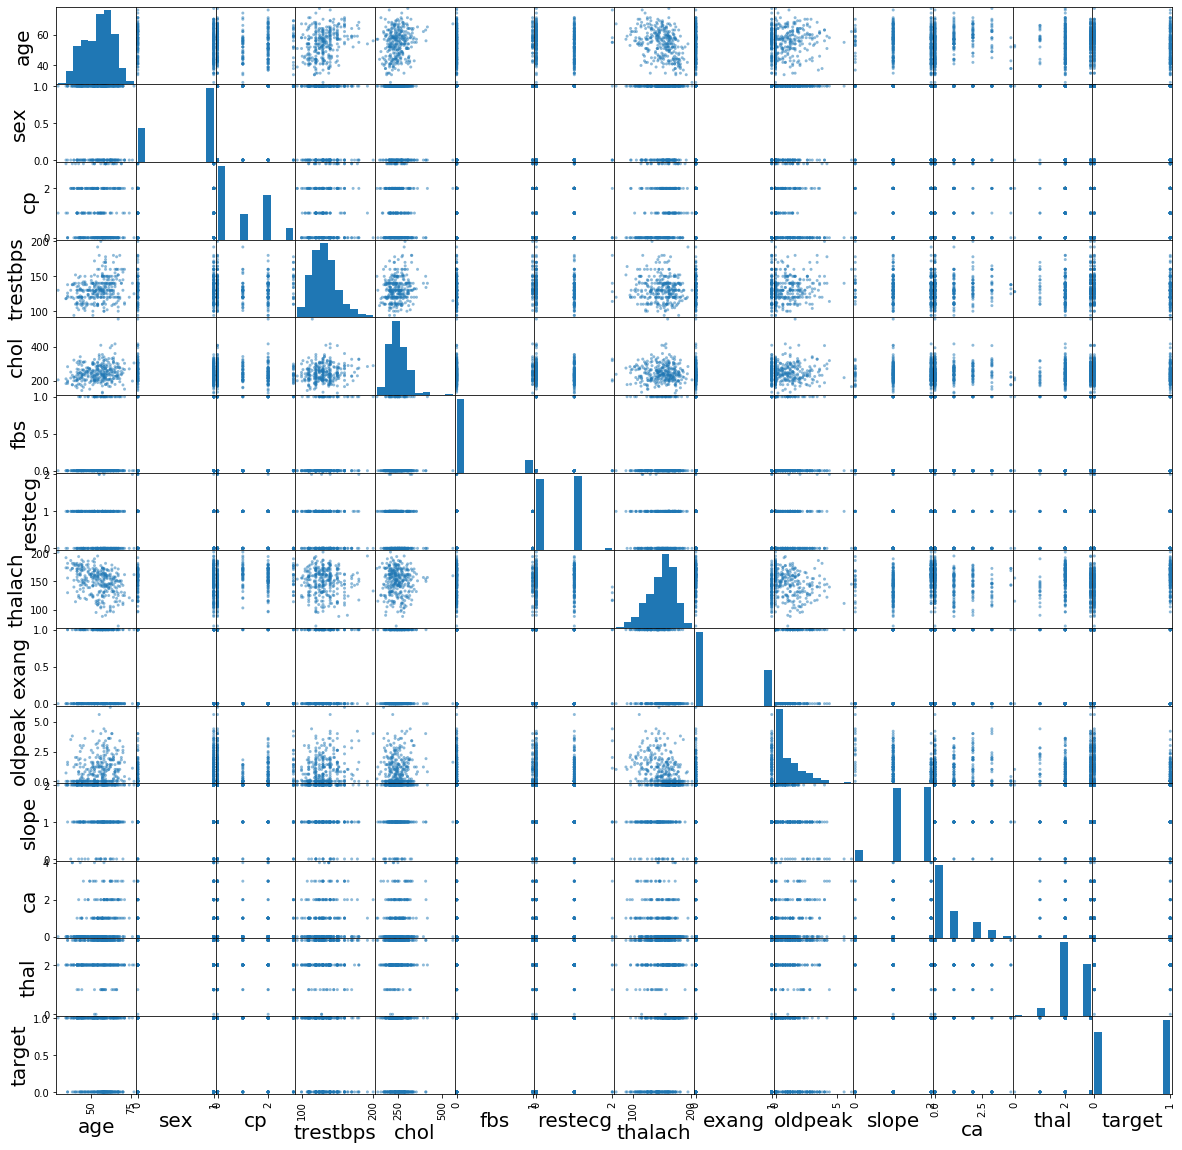

In [5]:
# Gráfico del Variable vs Variable

graf = pd.plotting.scatter_matrix(df, figsize=(20,20), alpha = 0.5)
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 10) for item in graf.ravel()]
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 10) for item in graf.ravel()]
[plt.setp(item.yaxis.get_label(), 'size', 20) for item in graf.ravel()]
[plt.setp(item.xaxis.get_label(), 'size', 20) for item in graf.ravel()]
plt.show()

De acuerdo a los datos vistos se observan varias columnas con datos categóricos. De acuerdo a lo anterior se crearán variables auxiliares para las siguientes variables:

- **(cp1)**      : cp = 1
- **(cp2)**      : cp = 2
- **(cp3)**      : cp = 3
- **(restecg1)** : restecg = 1
- **(restecg2)** : restecg = 2
- **(slope1)**   : slope = 1
- **(slope2)**   : slope = 2
- **(ca1)**      : ca = 1
- **(ca2)**      : ca = 2
- **(ca3)**      : ca = 3
- **(ca4)**      : ca = 4
- **(thal1)**    : thal = 1
- **(thal2)**    : thal = 2
- **(thal3)**    : thal = 3

In [6]:
data_header_new = ['age', 'sex', 'cp1', 'cp2', 'cp3', 'trestbps', 'chol', 'fbs', 'restecg1', 'restecg2', 'thalach',
                   'exang', 'oldpeak', 'slope1', 'slope2', 'ca1', 'ca2', 'ca3', 'ca4', 'thal1', 'thal2', 'thal3', 'target']
x_vals = np.array([[x[0], x[1], x[2]==1, x[2]==2, x[2]==3, x[3], x[4], x[5], x[6]==1, x[6]==2, x[7], x[8], x[9],
                     x[10]==1, x[10]==2, x[11]==1, x[11]==2, x[11]==3, x[11]==4, x[12]==1, x[12]==2, x[12]==3 ]
                    for x in x_vals0])

pd.DataFrame(x_vals, columns=data_header_new[0:(len(data_header_new)-1)]).head(10)


,age,sex,cp1,cp2,cp3,trestbps,chol,fbs,restecg1,restecg2,...,oldpeak,slope1,slope2,ca1,ca2,ca3,ca4,thal1,thal2,thal3
0,63.0,1.0,0.0,0.0,1.0,145.0,233.0,1.0,0.0,0.0,...,2.3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,37.0,1.0,0.0,1.0,0.0,130.0,250.0,0.0,1.0,0.0,...,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,41.0,0.0,1.0,0.0,0.0,130.0,204.0,0.0,0.0,0.0,...,1.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,56.0,1.0,1.0,0.0,0.0,120.0,236.0,0.0,1.0,0.0,...,0.8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,57.0,0.0,0.0,0.0,0.0,120.0,354.0,0.0,1.0,0.0,...,0.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,57.0,1.0,0.0,0.0,0.0,140.0,192.0,0.0,1.0,0.0,...,0.4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,56.0,0.0,1.0,0.0,0.0,140.0,294.0,0.0,0.0,0.0,...,1.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,44.0,1.0,1.0,0.0,0.0,120.0,263.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,52.0,1.0,0.0,1.0,0.0,172.0,199.0,1.0,1.0,0.0,...,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,57.0,1.0,0.0,1.0,0.0,150.0,168.0,0.0,1.0,0.0,...,1.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
# dividir datos en conjunto de entrenamiento y validación
f_train_valid = 0.8
np.random.seed(123)
train_idx = np.random.choice(len(x_vals), round(len(x_vals)*f_train_valid), replace=False)
valid_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))

In [8]:
x_vals_train = x_vals[train_idx,]
x_vals_valid = x_vals[valid_idx]
y_vals_train = y_vals[train_idx]
y_vals_valid = y_vals[valid_idx]

In [9]:
# función de normalización por columna.
def normalize_cols(m, col_min = np.array([None]), col_max = np.array([None])):
    if not col_min[0]:
        col_min = m.min(axis=0)
    if not col_max[0]:
        col_max = m.max(axis=0)
    return(m-col_min)/(col_max-col_min), col_min, col_max

In [10]:
x_vals_train, train_min, train_max = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_valid,_,_ = np.nan_to_num(normalize_cols(x_vals_valid, train_min, train_max))
pd.DataFrame(x_vals_train, columns=data_header_new[0:(len(data_header_new)-1)]).head(10)

,age,sex,cp1,cp2,cp3,trestbps,chol,fbs,restecg1,restecg2,...,oldpeak,slope1,slope2,ca1,ca2,ca3,ca4,thal1,thal2,thal3
0,0.395833,0.0,0.0,1.0,0.0,0.339623,0.332564,0.0,1.0,0.0,...,0.032258,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.604167,0.0,0.0,0.0,0.0,0.716981,0.217090,1.0,0.0,0.0,...,0.451613,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.562500,1.0,0.0,0.0,0.0,0.339623,0.351039,1.0,0.0,0.0,...,0.258065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.520833,1.0,0.0,0.0,0.0,0.264151,0.357968,0.0,0.0,0.0,...,0.516129,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.333333,0.0,1.0,0.0,0.0,0.169811,0.066975,0.0,1.0,0.0,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.645833,1.0,0.0,0.0,0.0,0.292453,0.293303,0.0,0.0,0.0,...,0.451613,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.333333,1.0,1.0,0.0,0.0,0.320755,0.408776,0.0,0.0,0.0,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.625000,1.0,0.0,0.0,0.0,0.386792,0.237875,0.0,1.0,0.0,...,0.080645,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.708333,0.0,0.0,1.0,0.0,0.386792,0.279446,0.0,0.0,0.0,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.354167,1.0,0.0,1.0,0.0,0.528302,0.230947,0.0,1.0,0.0,...,0.580645,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


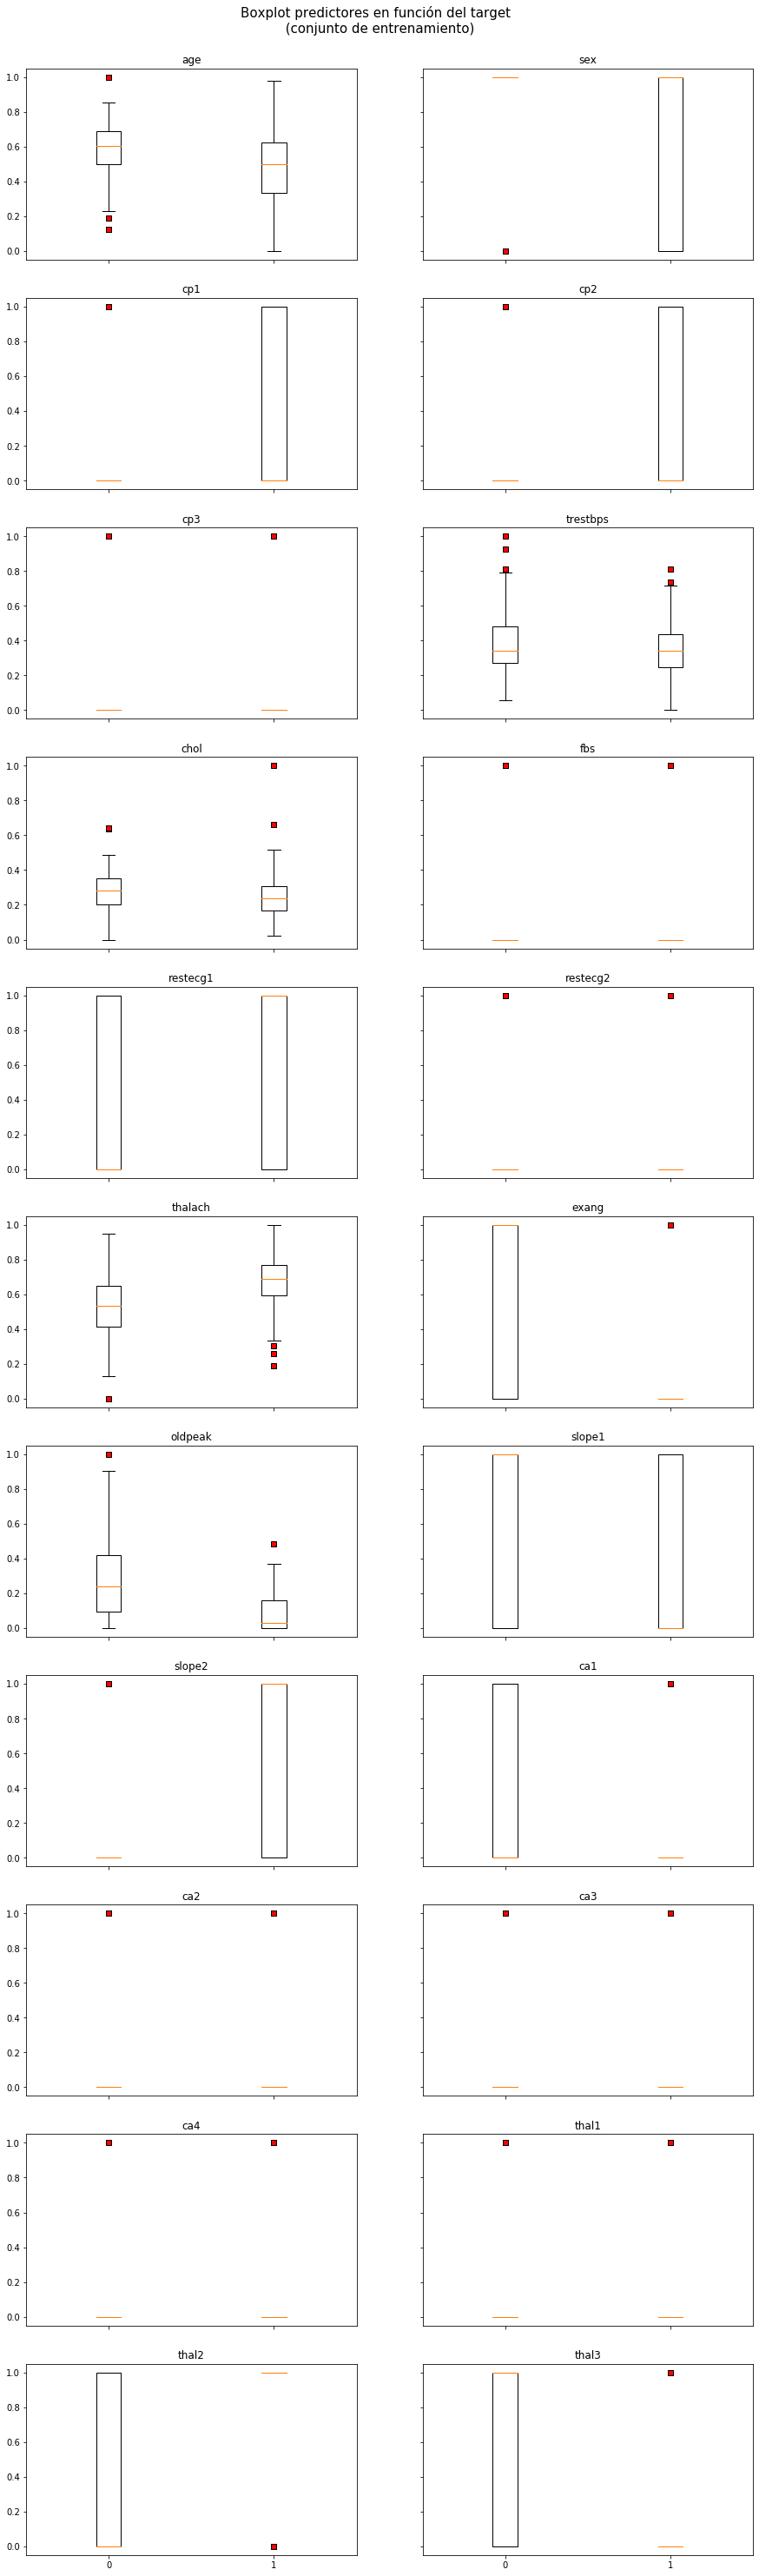

In [11]:
idx_0 = np.array([x==0 for x in y_vals_train])
idx_1 = np.array([x==1 for x in y_vals_train])

#Gráfico del Puntaje vs cada Predictor
fig, axs = plt.subplots(11, 2, sharex=False, figsize=[15,50])
fig.suptitle('Boxplot predictores en función del target \n (conjunto de entrenamiento)',
             y=0.94, size=15)
fig.subplots_adjust(hspace=0.2, wspace=0.2, top=0.92)
plt.setp(axs, xticklabels=['0', '1'])
#color = ['blue', 'red', 'green', 'orange']

nn = 0
for n1 in range(11):
    for n2 in range(2):
        axs[n1,n2].boxplot([x_vals_train[idx_0,nn], x_vals_train[idx_1,nn]],
                           flierprops=dict(markerfacecolor='r', marker='s'))
        axs[n1,n2].set_title(data_header_new[nn])
        nn = nn + 1
        
for ax in fig.get_axes():
    ax.label_outer()

Visualizando los boxplots de cada predictor se observa que algunos predictores no discriminan muy bien en función del target y por otro lado los predictores binarios pueden causar confusión. 

Para visualizar mejor la relación entre las variables se realiza la correlación entre estas mostrados en el siguiente mapa de correlación.

,target,slope1,slope2,thal2,thal3
target,1.000000,0.360504,0.411127,0.501477,0.461392
slope1,0.360504,1.000000,0.868724,0.276554,0.212065
slope2,0.411127,0.868724,1.000000,0.329625,0.238169
thal2,0.501477,0.276554,0.329625,1.000000,0.850790
thal3,0.461392,0.212065,0.238169,0.850790,1.000000


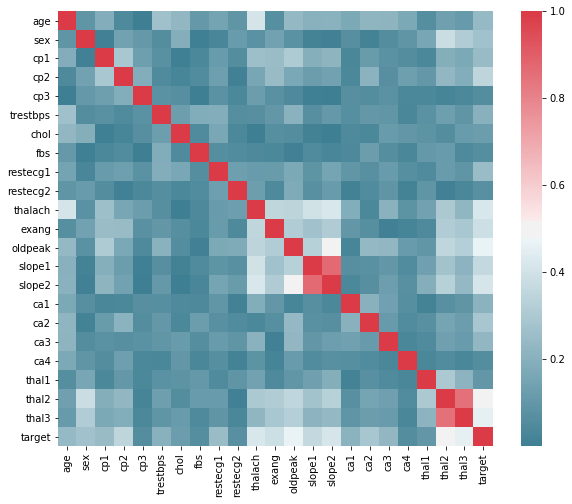

In [12]:
import seaborn as sns 

x_vals_train3 = pd.DataFrame(x_vals_train, columns=data_header_new[0:(len(data_header_new)-1)])
x_vals_train3['target'] = pd.Series(y_vals_train, index=x_vals_train3.index)

f, ax = plt.subplots(figsize=(10, 8)) 
corr = abs(pd.DataFrame(x_vals_train3, columns=data_header_new[0:(len(data_header_new))]).corr() )
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

corr.loc[['target', 'slope1', 'slope2', 'thal2', 'thal3']][['target', 'slope1', 'slope2', 'thal2', 'thal3']]

Se observa que ninguna variable presenta mucha correlación con el target ni entre si, exceptuando las variables *thal2-thal3* y *slope1-slope2*.

Para simplificar el problema eliminaremos las variables con correlación menor a 0.3, además de las variables *slope1* y *thal3*.

In [13]:
zero = 0 # elimina la variable independiente de su correlación con target
idx_type = [1,1,1,1,1,1,1,1,1,1,1,1,1,zero,1,1,1,1,1,1,zero,1]
corr_min = 0.3
corr2 = corr.loc['target'][0:(len(corr)-1)]*idx_type
print(corr2[corr2>corr_min].index)

Index(['cp2', 'thalach', 'exang', 'oldpeak', 'slope2', 'thal3'], dtype='object')


In [14]:
# Filtro variables consideradas para clasificación
x_vals_train = x_vals_train[:,np.where(corr2>corr_min)[0]]
x_vals_valid = x_vals_valid[:,np.where(corr2>corr_min)[0]]

## Modelos de clasificación

Se consideran los siguientes algoritmos de clasificación:
- Regresión Logística.
- SVM lineal.
- SVM Radial.
- KNN.
- Red Neuronal.

### Regresión Logística

In [15]:
# Declaración de Sesion y fijado de semillas aleatorias.
session = tf.Session()
tf.set_random_seed(123)
np.random.seed(123)


# Hiperparámetros
epochs = 6000
batch_size = int(np.round(x_vals_train.shape[0]*0.6)) # 60% del conjunto de entrenamiento
learning_rate = 0.02

# Declaración de placeholders
x_data = tf.placeholder(shape=[None, x_vals_train.shape[1]], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)


# Declaración de variables
A_rl = tf.Variable(tf.random_normal(shape = [x_vals_train.shape[1],1]))
b_rl = tf.Variable(tf.random_normal(shape = [1,1]))

# Declaración de predicción
y_pred = tf.add(tf.matmul(x_data, A_rl), b_rl)

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
# Función de pérdidas
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=y_pred, labels= y_target))

# Inicialización de varibles
init = tf.global_variables_initializer()
session.run(init)

# Optimizador
my_optim = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_optim.minimize(loss)

# Clasificador (probabilidad de 1)
classification_lr = tf.round(tf.sigmoid(y_pred))
correct_classification = tf.cast(tf.equal(classification_lr, y_target), tf.float32)
accuracy = tf.reduce_mean(correct_classification)

#### Entrenamiento de algoritmo.


El entrenamiento se lleva a cabo de la siguiente manera:
- Toma una muestra aleatoria de tamaño *batch_size* para entrenar el algoritmo.
- Con los datos restantes del conjunto de entrenamiento se crea un conjunto de test, donde se evalúan los resultados del entrenamiento iteración a iteración.
- Con el conjunto de validación (totalmente independiente) se evalúa el desempeño del algoritmo y la exactitud (accuracy) para poder comparar con otros métodos.

In [17]:
# perdidas de entrenamiento, pruebas y validación
loss_vec_train = []
loss_vec_test = []
loss_vec_val = []

# accuracy de entrenamiento, pruebas y validación
train_acc = []
test_acc = []
val_acc = []

for i in range(epochs):
    # carga las observaciones aleatorias de entrenamiento y pruebas
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_test_idx = np.array(list(set(range(len(x_vals_train)))-set(rand_idx)))
    
    # separa conjunto de prueba aleatorio
    rand_x = x_vals_train[rand_idx]
    rand_y = np.transpose([y_vals_train[rand_idx]])
    
    # separa conjunto de prueba aleatorio
    rand_test_x = x_vals_train[rand_test_idx]
    rand_test_y = np.transpose([y_vals_train[rand_test_idx]])
    
    # entrenamiento iteracion i
    session.run(train_step, feed_dict={x_data : rand_x, y_target: rand_y})
    
    # perdidas del conjunto de entrenamiento
    temp_loss_train = session.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec_train.append(temp_loss_train)
    
    # perdidas del conjunto de prueba
    temp_loss_test = session.run(loss, feed_dict={x_data: rand_test_x, y_target: rand_test_y})
    loss_vec_test.append(temp_loss_test)
    
    # perdidas del conjunto de validación   
    temp_loss_val = session.run(loss, feed_dict={x_data: x_vals_valid, y_target: np.transpose([y_vals_valid])})
    loss_vec_val.append(temp_loss_val)
    
    # accuracy del conjunto de entrenamiento
    temp_acc_train = session.run(accuracy, feed_dict={x_data: rand_x, y_target: rand_y})
    train_acc.append(temp_acc_train)
    
    # accuracy del conjunto de prueba
    temp_acc_test = session.run(accuracy, feed_dict={x_data: rand_test_x, y_target: rand_test_y})
    test_acc.append(temp_acc_test)

    # accuracy del conjunto de validación
    temp_acc_val = session.run(accuracy, feed_dict={x_data: x_vals_valid, y_target: np.transpose([y_vals_valid])})
    val_acc.append(temp_acc_val)
    
    if(i+1)%np.round(epochs/30)==0:
        acc_and_loss = [i+1, temp_loss_train, temp_loss_test, temp_loss_val,
                        temp_acc_train, temp_acc_test, temp_acc_val]
        print("Paso #{}, Train Loss {:.2f}, Test Loss {:.2f}, Valid Loss {:.2f}, Train Acc {:.2f}, Test Acc {:.2f}, Valid Acc {:.2f}".format(*acc_and_loss))        

Paso #200, Train Loss 1.07, Test Loss 1.05, Valid Loss 1.13, Train Acc 0.41, Test Acc 0.49, Valid Acc 0.41
Paso #400, Train Loss 0.60, Test Loss 0.63, Valid Loss 0.63, Train Acc 0.72, Test Acc 0.67, Valid Acc 0.66
Paso #600, Train Loss 0.54, Test Loss 0.53, Valid Loss 0.53, Train Acc 0.74, Test Acc 0.81, Valid Acc 0.82
Paso #800, Train Loss 0.49, Test Loss 0.49, Valid Loss 0.49, Train Acc 0.77, Test Acc 0.81, Valid Acc 0.84
Paso #1000, Train Loss 0.49, Test Loss 0.48, Valid Loss 0.46, Train Acc 0.80, Test Acc 0.79, Valid Acc 0.85
Paso #1200, Train Loss 0.44, Test Loss 0.46, Valid Loss 0.45, Train Acc 0.82, Test Acc 0.82, Valid Acc 0.85
Paso #1400, Train Loss 0.42, Test Loss 0.47, Valid Loss 0.44, Train Acc 0.81, Test Acc 0.80, Valid Acc 0.85
Paso #1600, Train Loss 0.41, Test Loss 0.48, Valid Loss 0.43, Train Acc 0.84, Test Acc 0.78, Valid Acc 0.85
Paso #1800, Train Loss 0.43, Test Loss 0.43, Valid Loss 0.42, Train Acc 0.79, Test Acc 0.84, Valid Acc 0.85
Paso #2000, Train Loss 0.48, Tes

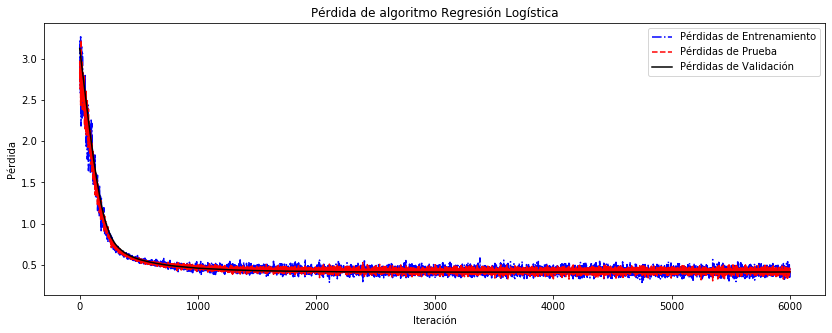

In [18]:
plt.figure(figsize=(14,5))
plt.plot(loss_vec_train, 'b-.', label="Pérdidas de Entrenamiento")
plt.plot(loss_vec_test, 'r--', label="Pérdidas de Prueba")
plt.plot(loss_vec_val, 'k-', label="Pérdidas de Validación")
plt.title("Pérdida de algoritmo Regresión Logística")
plt.xlabel("Iteración")
plt.ylabel("Pérdida")
plt.legend(loc="upper right")
plt.show()

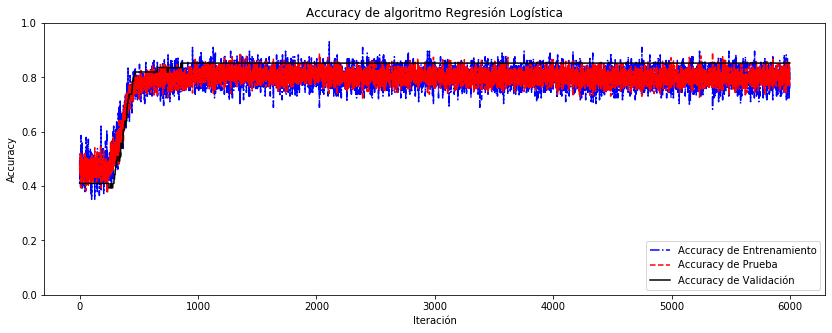

In [19]:
plt.figure(figsize=(14,5))
plt.plot(train_acc, 'b-.', label="Accuracy de Entrenamiento")
plt.plot(test_acc, 'r--', label="Accuracy de Prueba")
plt.plot(val_acc, 'k-', label="Accuracy de Validación")
plt.title("Accuracy de algoritmo Regresión Logística")
plt.xlabel("Iteración")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.ylim(0,1)
plt.show()
session.close()
ACC_VAL = []
ACC_VAL.append(val_acc[len(val_acc)-1])

### SVM Lineal

In [20]:
# Declaración de Sesion y fijado de semillas aleatorias.
session = tf.Session()
tf.set_random_seed(123)
np.random.seed(123)

# preparación de variables target para algoritmo
y_vals_train2 = np.array([1 if y == 0 else -1 for y in y_vals_train])
y_vals_valid2 = np.array([1 if y == 0 else -1 for y in y_vals_valid])

# Hiperparámetros
epochs = 6000
batch_size = int(np.round(x_vals_train.shape[0]*0.6)) # 60% del conjunto de entrenamiento
learning_rate = 0.01
alpha = tf.constant([0.1])

# Declaración de placeholders
x_data = tf.placeholder(shape=[None, x_vals_train.shape[1]], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)


# Declaración de variables
A_svml = tf.Variable(tf.random_normal(shape = [x_vals_train.shape[1],1]))
b_svml = tf.Variable(tf.random_normal(shape = [1,1]))

# Declaración de predicción
y_pred = tf.subtract(tf.matmul(x_data, A_svml), b_svml)

In [21]:
# Función de pérdidas
l2_norm = tf.reduce_sum(tf.square(A_svml))
classification_term = tf.reduce_mean(tf.maximum(0.0, tf.subtract(1.0, tf.multiply(y_pred, y_target))))
loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

# Inicialización de varibles
init = tf.global_variables_initializer()
session.run(init)

# Optimizador
my_optim = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_optim.minimize(loss)

# Clasificador 
prediction = tf.sign(y_pred)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))

#### Entrenamiento de algoritmo.


El entrenamiento se lleva a cabo de la siguiente manera:
- Toma una muestra aleatoria de tamaño *batch_size* para entrenar el algoritmo.
- Con los datos restantes del conjunto de entrenamiento se crea un conjunto de test, donde se evalúan los resultados del entrenamiento iteración a iteración.
- Con el conjunto de validación (totalmente independiente) se evalúa el desempeño del algoritmo y la exactitud (accuracy) para poder comparar con otros métodos.

In [22]:
# perdidas de entrenamiento, pruebas y validación
loss_vec_train = []
loss_vec_test = []
loss_vec_val = []

# accuracy de entrenamiento, pruebas y validación
train_acc = []
test_acc = []
val_acc = []

for i in range(epochs):
    # carga las observaciones aleatorias de entrenamiento y pruebas
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_test_idx = np.array(list(set(range(len(x_vals_train)))-set(rand_idx)))
    
    # separa conjunto de prueba aleatorio
    rand_x = x_vals_train[rand_idx]
    rand_y = np.transpose([y_vals_train2[rand_idx]])
    
    # separa conjunto de prueba aleatorio
    rand_test_x = x_vals_train[rand_test_idx]
    rand_test_y = np.transpose([y_vals_train2[rand_test_idx]])
    
    # entrenamiento iteracion i
    session.run(train_step, feed_dict={x_data : rand_x, y_target: rand_y})
    
    # perdidas del conjunto de entrenamiento
    temp_loss_train = session.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})[0]
    loss_vec_train.append(temp_loss_train)
    
    # perdidas del conjunto de prueba
    temp_loss_test = session.run(loss, feed_dict={x_data: rand_test_x, y_target: rand_test_y})[0]
    loss_vec_test.append(temp_loss_test)
    
    # perdidas del conjunto de validación   
    temp_loss_val = session.run(loss, feed_dict={x_data: x_vals_valid, y_target: np.transpose([y_vals_valid2])})[0]
    loss_vec_val.append(temp_loss_val)
    
    # accuracy del conjunto de entrenamiento
    temp_acc_train = session.run(accuracy, feed_dict={x_data: rand_x, y_target: rand_y})
    train_acc.append(temp_acc_train)
    
    # accuracy del conjunto de prueba
    temp_acc_test = session.run(accuracy, feed_dict={x_data: rand_test_x, y_target: rand_test_y})
    test_acc.append(temp_acc_test)

    # accuracy del conjunto de validación
    temp_acc_val = session.run(accuracy, feed_dict={x_data: x_vals_valid, y_target: np.transpose([y_vals_valid2])})
    val_acc.append(temp_acc_val)
    
    if(i+1)%np.round(epochs/30)==0:
        acc_and_loss = [i+1, temp_loss_train, temp_loss_test, temp_loss_val,
                        temp_acc_train, temp_acc_test, temp_acc_val]
        print("Paso #{}, Train Loss {:.2f}, Test Loss {:.2f}, Valid Loss {:.2f}, Train Acc {:.2f}, Test Acc {:.2f}, Valid Acc {:.2f}".format(*acc_and_loss))        

Paso #200, Train Loss 1.14, Test Loss 0.99, Valid Loss 0.82, Train Acc 0.63, Test Acc 0.71, Valid Acc 0.84
Paso #400, Train Loss 0.77, Test Loss 0.83, Valid Loss 0.61, Train Acc 0.72, Test Acc 0.68, Valid Acc 0.84
Paso #600, Train Loss 0.77, Test Loss 0.72, Valid Loss 0.58, Train Acc 0.72, Test Acc 0.77, Valid Acc 0.84
Paso #800, Train Loss 0.75, Test Loss 0.69, Valid Loss 0.58, Train Acc 0.76, Test Acc 0.79, Valid Acc 0.87
Paso #1000, Train Loss 0.75, Test Loss 0.71, Valid Loss 0.59, Train Acc 0.80, Test Acc 0.73, Valid Acc 0.87
Paso #1200, Train Loss 0.68, Test Loss 0.71, Valid Loss 0.59, Train Acc 0.77, Test Acc 0.78, Valid Acc 0.87
Paso #1400, Train Loss 0.61, Test Loss 0.74, Valid Loss 0.60, Train Acc 0.86, Test Acc 0.74, Valid Acc 0.87
Paso #1600, Train Loss 0.66, Test Loss 0.73, Valid Loss 0.60, Train Acc 0.79, Test Acc 0.77, Valid Acc 0.87
Paso #1800, Train Loss 0.64, Test Loss 0.72, Valid Loss 0.61, Train Acc 0.80, Test Acc 0.78, Valid Acc 0.87
Paso #2000, Train Loss 0.73, Tes

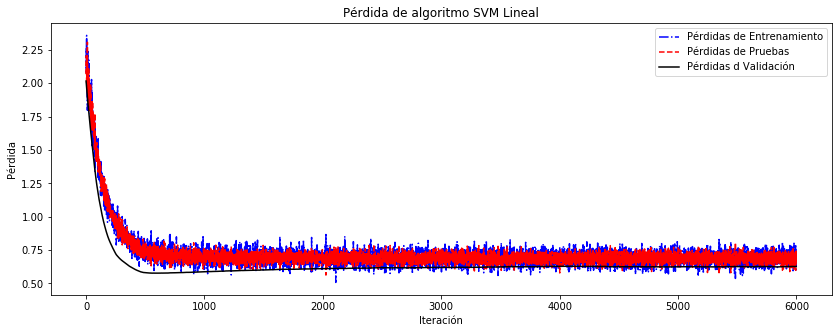

In [23]:
plt.figure(figsize=(14,5))
plt.plot(loss_vec_train, 'b-.', label="Pérdidas de Entrenamiento")
plt.plot(loss_vec_test, 'r--', label="Pérdidas de Pruebas")
plt.plot(loss_vec_val, 'k-', label="Pérdidas d Validación")
plt.title("Pérdida de algoritmo SVM Lineal")
plt.xlabel("Iteración")
plt.ylabel("Pérdida")
plt.legend(loc="upper right")
plt.show()

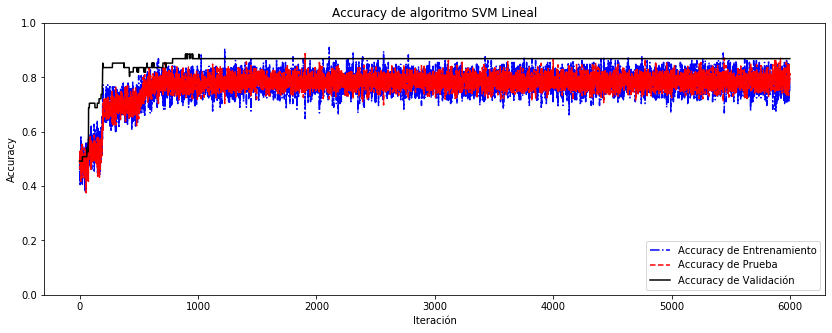

In [24]:
plt.figure(figsize=(14,5))
plt.plot(train_acc, 'b-.', label="Accuracy de Entrenamiento")
plt.plot(test_acc, 'r--', label="Accuracy de Prueba")
plt.plot(val_acc, 'k-', label="Accuracy de Validación")
plt.title("Accuracy de algoritmo SVM Lineal")
plt.xlabel("Iteración")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.ylim(0,1)
plt.show()
session.close()
ACC_VAL.append(val_acc[len(val_acc)-1])

### SVM Radial

In [25]:
# Declaración de Sesion y fijado de semillas aleatorias.
session = tf.Session()
tf.set_random_seed(123)
np.random.seed(123)

# preparación de variables target para algoritmo
y_vals_train2 = np.array([1 if y == 0 else -1 for y in y_vals_train])
y_vals_valid2 = np.array([1 if y == 0 else -1 for y in y_vals_valid])

# Hiperparámetros
epochs = 6000
#batch_size = int(np.round(x_vals_train.shape[0]*0.60)) # 25% del conjunto de entrenamiento
batch_size = int(np.round(x_vals_valid.shape[0])) # Para no tener problemas con el conjunto de validación
learning_rate = 0.001
gamma = tf.constant(-5000.0)

# Declaración de placeholders
x_data = tf.placeholder(shape=[None, x_vals_train.shape[1]], dtype = tf.float32)
prediction_grid = tf.placeholder(shape=[None, x_vals_train.shape[1]], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)


# Declaración de variables
b_svmr = tf.Variable(tf.random_normal(shape=[1, batch_size]))

# Definición de Kernel
dist = tf.reduce_sum(tf.square(x_data), 1)
dist = tf.reshape(dist, [-1,1])
sq_distance = tf.add(tf.subtract(dist, tf.multiply(2.0, tf.matmul(x_data, tf.transpose(x_data)))), 
                     tf.transpose(dist))
my_kernel = tf.exp(tf.multiply(gamma, tf.abs(sq_distance)))


# Declaración de predicción
rA = tf.reshape(tf.reduce_sum(tf.square(x_data), 1), [-1, 1])
rB = tf.reshape(tf.reduce_sum(tf.square(prediction_grid),1), [-1,1])

pred_sq_dist = tf.add(tf.subtract(rA, tf.multiply(2.0, tf.matmul(x_data, tf.transpose(prediction_grid)))), 
                      tf.transpose(rB))
pred_kernel = tf.exp(tf.multiply(gamma, tf.abs(pred_sq_dist)))

prediction_output = tf.matmul(tf.multiply(tf.transpose(y_target), b_svmr), pred_kernel)
y_pred = tf.sign(prediction_output - tf.reduce_mean(prediction_output))

#y_pred = tf.subtract(tf.matmul(x_data, A_svml), b_svml)

In [26]:
# Función de pérdidas
first_sum = tf.reduce_sum(b_svmr)
b_vect_cross = tf.matmul(tf.transpose(b_svmr), b_svmr)
y_target_cross = tf.matmul(y_target, tf.transpose(y_target))
second_sum = tf.reduce_sum(tf.multiply(my_kernel, tf.multiply(b_vect_cross, y_target_cross)))
loss = tf.negative(tf.subtract(first_sum, second_sum))

# Inicialización de varibles
init = tf.global_variables_initializer()
session.run(init)

# Optimizador
my_optim = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_optim.minimize(loss)

# Clasificador 
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.squeeze(y_pred), tf.squeeze(y_target)), tf.float32))

#### Entrenamiento de algoritmo.


El entrenamiento se lleva a cabo de la siguiente manera:
- Toma una muestra aleatoria de tamaño *batch_size* para entrenar el algoritmo.
- Con los datos restantes del conjunto de entrenamiento se crea un conjunto de test, donde se evalúan los resultados del entrenamiento iteración a iteración.
- Con el conjunto de validación (totalmente independiente) se evalúa el desempeño del algoritmo y la exactitud (accuracy) para poder comparar con otros métodos.

In [27]:
# perdidas de entrenamiento, pruebas y validación
loss_vec_train = []
loss_vec_test = []
loss_vec_val = []

# accuracy de entrenamiento, pruebas y validación
train_acc = []
test_acc = []
val_acc = []

for i in range(epochs):
    # carga las observaciones aleatorias de entrenamiento y pruebas
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_test_idx = np.array(list(set(range(len(x_vals_train)))-set(rand_idx)))
    rand_test_idx = np.random.choice(rand_test_idx, size=batch_size)
    rand_val_idx = np.random.choice(len(x_vals_valid), size=batch_size)

    # separa conjunto de prueba aleatorio
    rand_x = x_vals_train[rand_idx]
    rand_y = np.transpose([y_vals_train2[rand_idx]])
    
    # separa conjunto de prueba aleatorio
    rand_test_x = x_vals_train[rand_test_idx]
    rand_test_y = np.transpose([y_vals_train2[rand_test_idx]])
    
    # separa conjunto de validacion aleatorio
    rand_val_x = x_vals_valid
    rand_val_y = np.transpose([y_vals_valid2])
    
    # entrenamiento iteracion i
    session.run(train_step, feed_dict={x_data : rand_x, y_target: rand_y})
    
    # perdidas del conjunto de entrenamiento
    temp_loss_train = session.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec_train.append(temp_loss_train)
    
    # perdidas del conjunto de prueba
    temp_loss_test = session.run(loss, feed_dict={x_data: rand_test_x, y_target: rand_test_y})
    loss_vec_test.append(temp_loss_test)
    
    # perdidas del conjunto de validación   
    temp_loss_val = session.run(loss, feed_dict={x_data: rand_val_x, y_target: rand_val_y})
    loss_vec_val.append(temp_loss_val)
    
    # accuracy del conjunto de entrenamiento
    temp_acc_train = session.run(accuracy, feed_dict={x_data: rand_x, y_target: rand_y, prediction_grid:rand_x})
    train_acc.append(temp_acc_train)
    
    # accuracy del conjunto de prueba
    temp_acc_test = session.run(accuracy, feed_dict={x_data: rand_test_x, y_target: rand_test_y, prediction_grid:rand_test_x})
    test_acc.append(temp_acc_test)

    # accuracy del conjunto de validación
    temp_acc_val = session.run(accuracy, feed_dict={x_data: rand_val_x, y_target: rand_val_y, prediction_grid:rand_val_x})
    val_acc.append(temp_acc_val)
    
    if(i+1)%np.round(epochs/30)==0:
        acc_and_loss = [i+1, temp_loss_train, temp_loss_test, temp_loss_val,
                        temp_acc_train, temp_acc_test, temp_acc_val]
        print("Paso #{}, Train Loss {:.2f}, Test Loss {:.2f}, Valid Loss {:.2f}, Train Acc {:.2f}, Test Acc {:.2f}, Valid Acc {:.2f}".format(*acc_and_loss))        

Paso #200, Train Loss 29.40, Test Loss 28.83, Valid Loss 25.29, Train Acc 0.57, Test Acc 0.64, Valid Acc 0.62
Paso #400, Train Loss 3.69, Test Loss 6.28, Valid Loss 3.70, Train Acc 0.77, Test Acc 0.66, Valid Acc 0.72
Paso #600, Train Loss -4.86, Test Loss -4.67, Valid Loss -5.97, Train Acc 0.80, Test Acc 0.82, Valid Acc 0.82
Paso #800, Train Loss -9.04, Test Loss -8.33, Valid Loss -10.20, Train Acc 0.90, Test Acc 0.95, Valid Acc 0.89
Paso #1000, Train Loss -9.83, Test Loss -9.85, Valid Loss -12.18, Train Acc 0.97, Test Acc 0.98, Valid Acc 0.95
Paso #1200, Train Loss -10.25, Test Loss -9.97, Valid Loss -13.11, Train Acc 1.00, Test Acc 0.95, Valid Acc 0.98
Paso #1400, Train Loss -9.38, Test Loss -10.36, Valid Loss -13.52, Train Acc 0.98, Test Acc 0.97, Valid Acc 0.98
Paso #1600, Train Loss -10.84, Test Loss -11.50, Valid Loss -13.72, Train Acc 1.00, Test Acc 1.00, Valid Acc 0.98
Paso #1800, Train Loss -10.92, Test Loss -9.43, Valid Loss -13.81, Train Acc 1.00, Test Acc 0.98, Valid Acc 0.

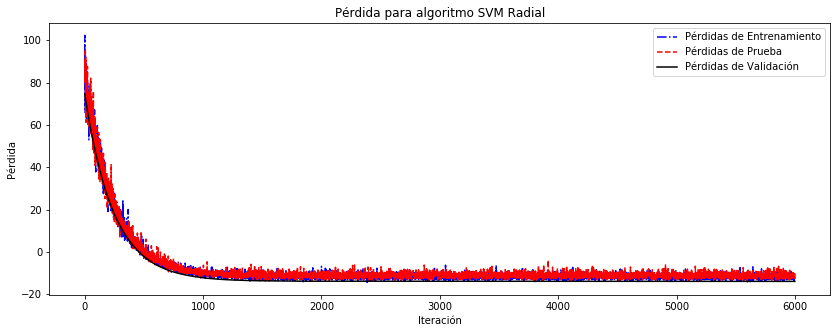

In [28]:
plt.figure(figsize=(14,5))
plt.plot(loss_vec_train, 'b-.', label="Pérdidas de Entrenamiento")
plt.plot(loss_vec_test, 'r--', label="Pérdidas de Prueba")
plt.plot(loss_vec_val, 'k-', label="Pérdidas de Validación")
plt.title("Pérdida para algoritmo SVM Radial")
plt.xlabel("Iteración")
plt.ylabel("Pérdida")
plt.legend(loc="upper right")
plt.show()

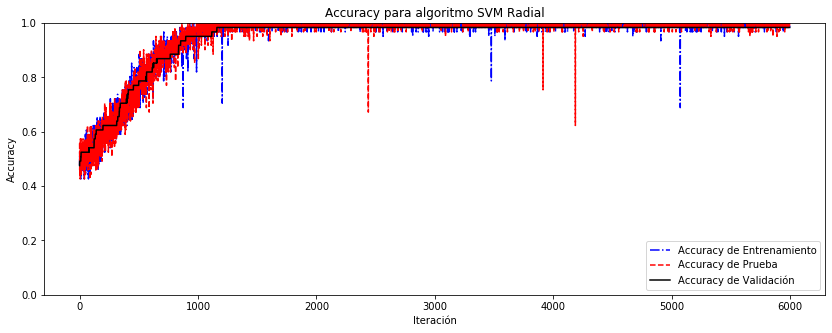

In [29]:
plt.figure(figsize=(14,5))
plt.plot(train_acc, 'b-.', label="Accuracy de Entrenamiento")
plt.plot(test_acc, 'r--', label="Accuracy de Prueba")
plt.plot(val_acc, 'k-', label="Accuracy de Validación")
plt.title("Accuracy para algoritmo SVM Radial")
plt.xlabel("Iteración")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.ylim(0,1)
plt.show()
session.close()
ACC_VAL.append(val_acc[len(val_acc)-1])

### KNN

In [30]:
# Declaración de Sesion y fijado de semillas aleatorias.
session = tf.Session()
tf.set_random_seed(123)
np.random.seed(123)

# Hiperparámetros
batch_size = len(x_vals_valid)
loops = int(batch_size) # número de iteraciones para calcular metricas promedio para cada k

# Declaración de placeholders
x_data_train = tf.placeholder(shape=[batch_size, x_vals_train.shape[1]], dtype=tf.float32)
x_data_test = tf.placeholder(shape=[batch_size, x_vals_train.shape[1]], dtype=tf.float32)
y_target_train = tf.placeholder(shape = [None, 1], dtype=tf.float32)
y_target_test = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Cálculo de matriz de ponderación de distancias
weight_matrix_2 = x_vals_train.std(0)
weight_matrix = tf.cast(tf.diag(weight_matrix_2), dtype=tf.float32)

# Cálculo de distancia
subs_term = tf.subtract(x_data_train, tf.expand_dims(x_data_test, 1))
first_prod = tf.matmul(subs_term, tf.tile(tf.expand_dims(weight_matrix,0), [batch_size, 1, 1]))
second_prod = tf.matmul(first_prod, tf.transpose(subs_term, perm=[0,2,1]))

distance = tf.sqrt(tf.matrix_diag_part(second_prod))

def knn(k, loop):
    # Toma los k datos con menor distancia al valor dado y cálcula su valor promedio
    top_k_xvals, top_k_idx = tf.nn.top_k(tf.negative(distance), k = k)
    x_sums = tf.expand_dims(tf.reduce_sum(top_k_xvals,1),1)
    x_sums_rep = tf.matmul(x_sums, tf.ones([1,k], tf.float32))
    x_vals_w = tf.expand_dims(tf.divide(top_k_xvals, x_sums_rep),1) # -> wi = di / \sum(dj)
    
    # Declaración de predicción
    top_k_yvals = tf.gather(y_target_train, top_k_idx)
    prediction = tf.squeeze(tf.matmul(x_vals_w, top_k_yvals),axis=[1]) ## \sum w_i y_i
    prediction = abs(tf.nn.relu(tf.sign(prediction -0.5)))
    
    # función de pérdida
    mse = tf.div(tf.reduce_sum(tf.square(tf.subtract(prediction, y_target_test))), batch_size)
    acc = 1 - tf.reduce_mean(abs(tf.subtract(prediction, y_target_test)))
    
    batch_mse =[]
    batch_acc = []
    for j in range(loop):
        # carga las observaciones aleatorias de entrenamiento y pruebas
        rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
        # separa conjunto de entrenamiento aleatorio
        rand_x = x_vals_train[rand_idx]
        rand_y = np.transpose([y_vals_train[rand_idx]])
        # separa conjunto de validacion aleatorio
        rand_val_x = x_vals_valid
        rand_val_y = np.transpose([y_vals_valid])

        # cálculo pérdida
        feed_dict={x_data_train: rand_x, x_data_test: rand_val_x, y_target_train: rand_y, y_target_test: rand_val_y}
        predictions = session.run(prediction, feed_dict=feed_dict)
        temp_mse = session.run(mse, feed_dict=feed_dict)
        temp_acc = session.run(acc, feed_dict=feed_dict)
        
        batch_mse.append(temp_mse)
        batch_acc.append(temp_acc)
        
    batch_mse = np.mean(batch_mse)
    batch_acc = np.mean(batch_acc)

    return batch_mse, batch_acc

#### Entrenamiento de algoritmo.

Este algoritmo no se entrena, los resultados se calculan a partir de los datos de los k vecinos más cercanos.

Para evaluar el algoritmo, se cálcula la exactitud promedio de los k vecinos más cercanos alrededor de 60 veces por cada k.

El valor de **k** con mayor  exactitud se selecciona para el modelo. La exactitud del conjunto de validación se calcula con este valor.

In [31]:
num_loops = int(batch_size/2)
mse_k = []
acc_k = []

for k in range(1, num_loops):
    mse_t, acc_t = knn(k, 30)
    mse_k.append(mse_t)
    acc_k.append(acc_t)
    
    acc_and_loss = [k, mse_t, acc_t]
    print("k = {}, Loss = {:.4f}, Acc = {:.3f}".format(*acc_and_loss))        

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
k = 1, Loss = 0.2765, Acc = 0.723
k = 2, Loss = 0.2699, Acc = 0.730
k = 3, Loss = 0.2776, Acc = 0.722
k = 4, Loss = 0.2568, Acc = 0.743
k = 5, Loss = 0.2716, Acc = 0.728
k = 6, Loss = 0.2579, Acc = 0.742
k = 7, Loss = 0.2585, Acc = 0.742
k = 8, Loss = 0.2443, Acc = 0.756
k = 9, Loss = 0.2213, Acc = 0.779
k = 10, Loss = 0.2197, Acc = 0.780
k = 11, Loss = 0.2251, Acc = 0.775
k = 12, Loss = 0.2213, Acc = 0.779
k = 13, Loss = 0.2169, Acc = 0.783
k = 14, Loss = 0.2115, Acc = 0.789
k = 15, Loss = 0.2087, Acc = 0.791
k = 16, Loss = 0.2191, Acc = 0.781
k = 17, Loss = 0.2120, Acc = 0.788
k = 18, Loss = 0.2399, Acc = 0.760
k = 19, Loss = 0.2077, Acc = 0.792
k = 20, Loss = 0.2279, Acc = 0.772
k = 21, Loss = 0.2137, Acc = 0.786
k = 22, Loss = 0.1945, Acc = 0.805
k = 23, Loss = 0.2317, Acc = 0.768
k = 24, Loss = 0.2175, Acc = 0.783
k = 25, Loss = 0.2273, Acc = 0.773
k = 26, Loss = 0.2022, Acc = 0.798
k = 27, Loss = 0.2311

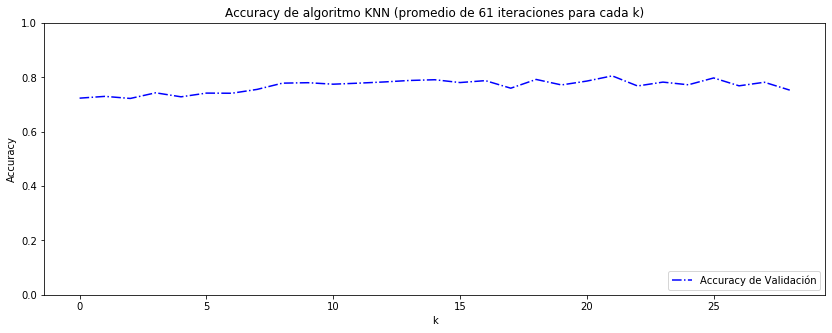

In [32]:
plt.figure(figsize=(14,5))
plt.plot(acc_k, 'b-.', label="Accuracy de Validación")
plt.title("Accuracy de algoritmo KNN (promedio de "+str(loops)+" iteraciones para cada k)")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.ylim(0,1)
plt.show()
session.close()

In [33]:
ACC_VAL.append(np.max(acc_k))
# Guarda valor de k con máximo Accuracy
indexKNN = np.where(acc_k==np.max(acc_k))[0]
indexKNN = indexKNN[0] + 1

### Red Neuronal

In [34]:
# Declaración de Sesion y fijado de semillas aleatorias.
session = tf.Session()
tf.set_random_seed(123)
np.random.seed(123)

# Hiperparámetros
epochs = 6000
batch_size = int(np.round(x_vals_train.shape[0]*0.7))
learning_rate = 0.008
layers = [x_vals_train.shape[1], 45, 25, 9]
sd = 0.1
alpha = 0.3

# Declaración de funciones weight y bias (variables)
def init_weight(shape, st_dev):
    weight = tf.Variable(tf.random_normal(shape = shape, stddev=st_dev))
    return weight

def init_bias(shape, st_dev):
    bias = tf.Variable(tf.random_normal(shape = shape, stddev=st_dev))
    return bias

# Definición de función de conexión
def full_connected(input_layer, weights, biases):
    layer = tf.add(tf.matmul(input_layer, weights), biases)
    layer = tf.nn.leaky_relu(layer, alpha=alpha)
    return(layer)

In [35]:
# Arquitectura de la red
## Capa 1
w1 = init_weight(shape=[layers[0], layers[1]], st_dev=sd)
b1 = init_bias(shape=[layers[1]], st_dev=sd)
layer1 = full_connected(x_data, w1, b1) 
## Capa 2
w2 = init_weight(shape=[layers[1], layers[2]], st_dev=sd)
b2 = init_bias(shape=[layers[2]], st_dev=sd)
layer2 = full_connected(layer1, w2, b2) 
## Capa 3
w3 = init_weight(shape=[layers[2], layers[3]], st_dev=sd)
b3 = init_bias(shape=[layers[3]], st_dev=sd)
layer3 = full_connected(layer2, w3, b3) 
## Capa 4
w4 = init_weight(shape=[layers[3],1], st_dev=sd)
b4 = init_bias(shape=[1], st_dev=sd)
layer4 = full_connected(layer3, w4, b4) 

# Función de pérdidas
loss_nn = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=layer4, labels= y_target))
#loss_nn = tf.reduce_mean(tf.square(y_target-layer4)))

# Inicialización de varibles
init = tf.global_variables_initializer()
session.run(init)

# Optimizador
my_optim = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_optim.minimize(tf.div_no_nan(loss_nn, 1))

# Clasificador (probabilidad de 1)
classification_lr = tf.round(tf.sigmoid(layer4))
#classification_lr = abs(tf.nn.relu(tf.sign(layer4 -0.5)))

correct_classification = tf.cast(tf.equal(classification_lr, y_target), tf.float32)
accuracy = tf.reduce_mean(correct_classification)

#### Entrenamiento de algoritmo.


El entrenamiento se lleva a cabo de la siguiente manera:
- Toma una muestra aleatoria de tamaño *batch_size* para entrenar el algoritmo.
- Con los datos restantes del conjunto de entrenamiento se crea un conjunto de test, donde se evalúan los resultados del entrenamiento iteración a iteración.
- Con el conjunto de validación (totalmente independiente) se evalúa el desempeño del algoritmo y la exactitud (accuracy) para poder comparar con otros métodos.

In [36]:
loss_vec_train = []
loss_vec_test = []
loss_vec_val = []
train_acc = []
test_acc = []
val_acc = []

for i in range(epochs):
    # carga las observaciones aleatorias de entrenamiento y pruebas
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_test_idx = np.array(list(set(range(len(x_vals_train)))-set(rand_idx)))
    
    # separa conjunto de prueba aleatorio
    rand_x = x_vals_train[rand_idx]
    rand_y = np.transpose([y_vals_train[rand_idx]])
    
    # separa conjunto de prueba aleatorio
    rand_test_x = x_vals_train[rand_test_idx]
    rand_test_y = np.transpose([y_vals_train[rand_test_idx]])
    
    # entrenamiento iteracion i
    session.run(train_step, feed_dict={x_data : rand_x, y_target: rand_y})
    
    # perdidas del conjunto de entrenamiento
    temp_loss_train = session.run(loss_nn, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec_train.append(temp_loss_train)

    # perdidas del conjunto de prueba
    temp_loss_test = session.run(loss_nn, feed_dict={x_data: rand_test_x, y_target: rand_test_y})
    loss_vec_test.append(temp_loss_test)
    
    # perdidas del conjunto de validación   
    temp_loss_val = session.run(loss_nn, feed_dict={x_data: x_vals_valid, y_target: np.transpose([y_vals_valid])})
    loss_vec_val.append(temp_loss_val)
    
     # accuracy del conjunto de entrenamiento
    temp_acc_train = session.run(accuracy, feed_dict={x_data: rand_x, y_target: rand_y})
    train_acc.append(temp_acc_train)
    
    # accuracy del conjunto de prueba
    temp_acc_test = session.run(accuracy, feed_dict={x_data: rand_test_x, y_target: rand_test_y})
    test_acc.append(temp_acc_test)

    # accuracy del conjunto de validación
    temp_acc_val = session.run(accuracy, feed_dict={x_data: x_vals_valid, y_target: np.transpose([y_vals_valid])})
    val_acc.append(temp_acc_val)
    
    if(i+1)%np.round(epochs/30)==0:
        acc_and_loss = [i+1, temp_loss_train, temp_loss_test, temp_loss_val,
                        temp_acc_train, temp_acc_test, temp_acc_val]
        print("Paso #{}, Train Loss {:.2f}, Test Loss {:.2f}, Valid Loss {:.2f}, Train Acc {:.2f}, Test Acc {:.2f}, Valid Acc {:.2f}".format(*acc_and_loss))        

# Predicción conjunto validación        
pred_test_nn = [x for x in session.run(classification_lr, feed_dict={x_data:x_vals_valid})]

Paso #200, Train Loss 0.70, Test Loss 0.69, Valid Loss 0.70, Train Acc 0.44, Test Acc 0.49, Valid Acc 0.41
Paso #400, Train Loss 0.69, Test Loss 0.69, Valid Loss 0.70, Train Acc 0.49, Test Acc 0.42, Valid Acc 0.41
Paso #600, Train Loss 0.69, Test Loss 0.69, Valid Loss 0.69, Train Acc 0.45, Test Acc 0.47, Valid Acc 0.41
Paso #800, Train Loss 0.69, Test Loss 0.69, Valid Loss 0.69, Train Acc 0.39, Test Acc 0.48, Valid Acc 0.41
Paso #1000, Train Loss 0.69, Test Loss 0.69, Valid Loss 0.69, Train Acc 0.40, Test Acc 0.47, Valid Acc 0.33
Paso #1200, Train Loss 0.69, Test Loss 0.69, Valid Loss 0.69, Train Acc 0.51, Test Acc 0.54, Valid Acc 0.59
Paso #1400, Train Loss 0.69, Test Loss 0.68, Valid Loss 0.68, Train Acc 0.49, Test Acc 0.58, Valid Acc 0.59
Paso #1600, Train Loss 0.68, Test Loss 0.69, Valid Loss 0.68, Train Acc 0.57, Test Acc 0.52, Valid Acc 0.59
Paso #1800, Train Loss 0.68, Test Loss 0.69, Valid Loss 0.68, Train Acc 0.57, Test Acc 0.47, Valid Acc 0.59
Paso #2000, Train Loss 0.67, Tes

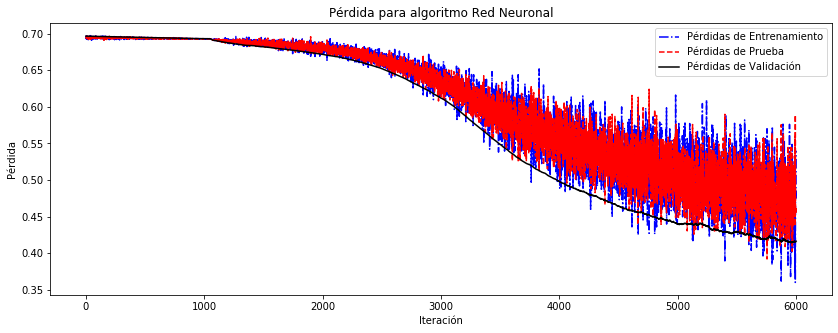

In [37]:
plt.figure(figsize=(14,5))
plt.plot(loss_vec_train, 'b-.', label="Pérdidas de Entrenamiento")
plt.plot(loss_vec_test, 'r--', label="Pérdidas de Prueba")
plt.plot(loss_vec_val, 'k-', label="Pérdidas de Validación")
plt.title("Pérdida para algoritmo Red Neuronal")
plt.xlabel("Iteración")
plt.ylabel("Pérdida")
plt.legend(loc="upper right")
plt.show()

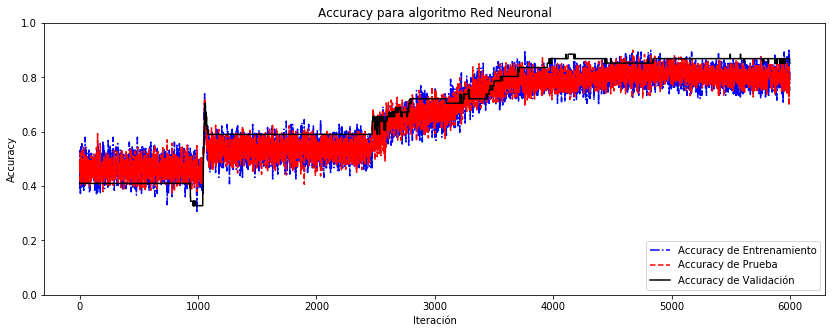

In [38]:
plt.figure(figsize=(14,5))
plt.plot(train_acc, 'b-.', label="Accuracy de Entrenamiento")
plt.plot(test_acc, 'r--', label="Accuracy de Prueba")
plt.plot(val_acc, 'k-', label="Accuracy de Validación")
plt.title("Accuracy para algoritmo Red Neuronal")
plt.xlabel("Iteración")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.ylim(0,1)
plt.show()
session.close()
ACC_VAL.append(val_acc[len(val_acc)-1])

### Resultados

In [39]:
pd.DataFrame(np.round(ACC_VAL, 5), columns=["Accuracy (conjunto de validación)"], 
             index=["Regresión Logística", " SVM-Lineal", " SVM-Radial", "KNN (k="+str(indexKNN)+")", "Red Neuronal"])

,Accuracy (conjunto de validación)
Regresión Logística,0.85246
SVM-Lineal,0.86885
SVM-Radial,0.98361
KNN (k=22),0.80546
Red Neuronal,0.85246


EL algoritmo que presenta el mejor desempeño es el *SVM Radial* con una exactitud de 0.98.

Es importante mencionar que la red neuronal puede mejorarse optimizando los hiperparámetros *learning_rate*, *layers* (define las capas y nodos de la red) y *alpha* (pendiente negativa de la *leaky relu*).



Link :https://github.com/desareca/Proyectos_tensorflow/tree/master/Probabilidad-Infarto-Cardiaco
